## Iris plants dataset
이 데이터셋은 150개의 데이터를 50개씩 3개의 클래스로 구분되어 있습니다.\
꽃받침 길이/너비, 꽃잎 길이/너비 데이터를 포함하며, 
3개의 클래스는 세토사(Setosa), 버시컬러(Versicolour), 버지니카(Virginica)로 분류되어 있습니다.
- ref. https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset

---

### Feature(X)

| 컬럼명 | 의미   | 
|:-------|:-------|
| sepal length (cm)   | 꽃받침 길이   | 
| sepal width (cm)   | 꽃받침 너비   | 
| petal length (cm)   | 꽃잎 길이 | 
| petal width (cm)    | 꽃잎 너비 | 

### Target(y)

| 컬럼명 | 의미 |
|:-----|:-----|
|target|붓꽃의 품종(종류)|

- Iris setosa : 0
- Iris versicolour : 1
- Iris virginica : 2

In [32]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
df = iris.frame  # 전체 데이터프레임
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### EDA (탐색적 데이터 분석)

In [16]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [18]:
df.describe() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<Axes: >

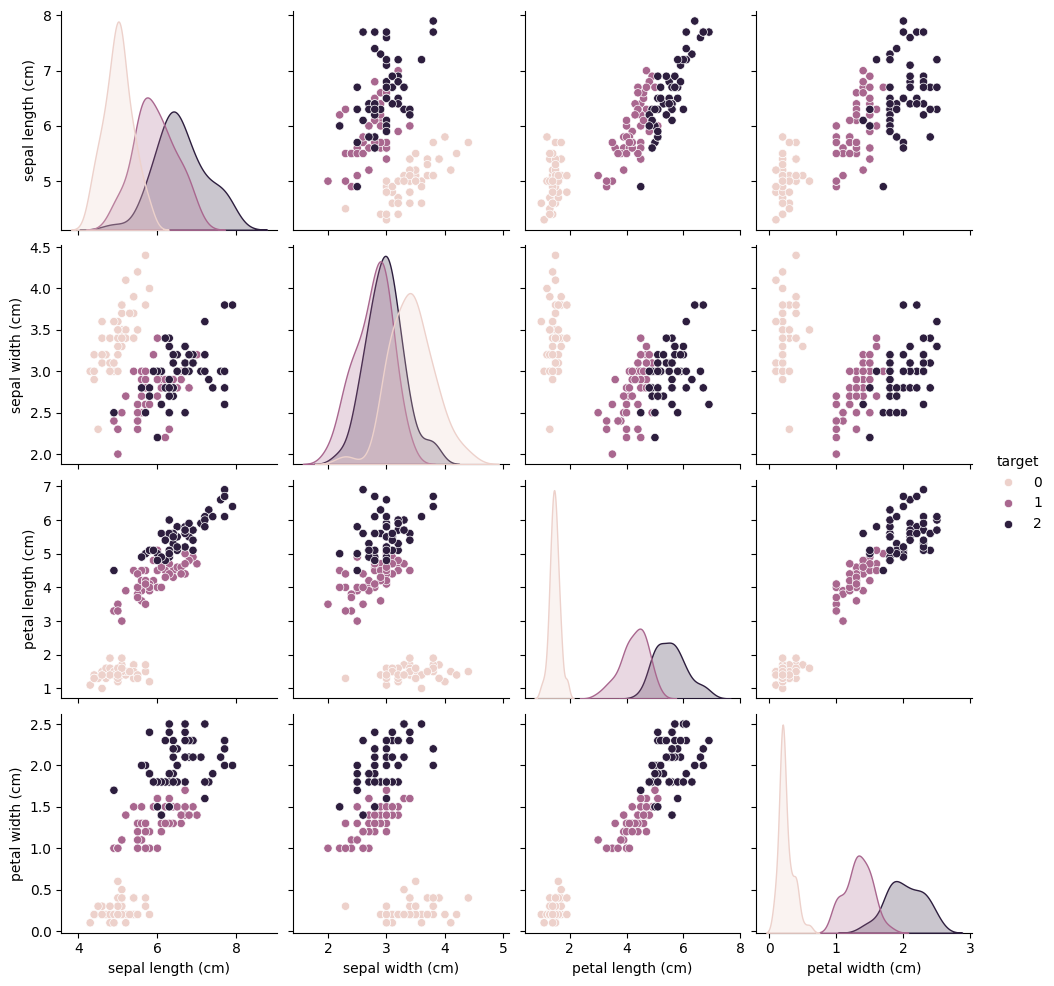

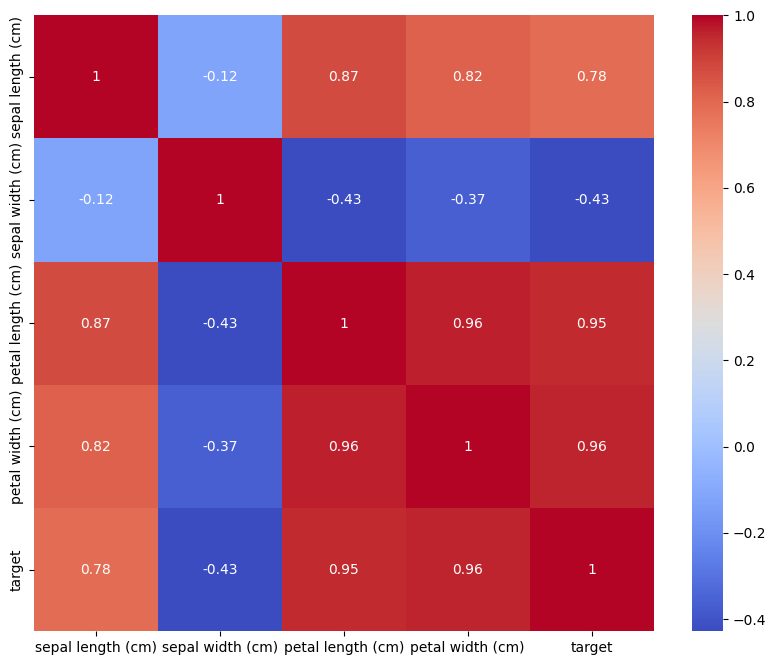

In [19]:
# pairplot : 변수들 간의 관계 시각화
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='target') 
# hue='target' : target 기준으로 색상을 다르게 구분하여 표시
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

### 독립변수, 종속변수 구분 후 훈련용,테스트용 데이터 분리

In [20]:
# 독립변수, 종속변수 구분
x = df.drop('target', axis=1)
y = df['target']

# 훈련용, 테스트용 데이터 분리
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### 스케일링
- 평균을 제거하고 단위 분산으로 특성을 표준화 
- 데이터를 평균이 0, 표준편차가 1인 정규분포 형태로 변환

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# 독립변수(입력, x)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled
x_test_scaled

array([[ 0.35451684, -0.58505976,  0.55777524,  0.02224751],
       [-0.13307079,  1.65083742, -1.16139502, -1.17911778],
       [ 2.30486738, -1.0322392 ,  1.8185001 ,  1.49058286],
       [ 0.23261993, -0.36147005,  0.44316389,  0.4227026 ],
       [ 1.2077952 , -0.58505976,  0.61508092,  0.28921757],
       [-0.49876152,  0.75647855, -1.27600637, -1.04563275],
       [-0.2549677 , -0.36147005, -0.07258719,  0.15573254],
       [ 1.32969211,  0.08570939,  0.78699794,  1.49058286],
       [ 0.47641375, -1.92659808,  0.44316389,  0.4227026 ],
       [-0.01117388, -0.80864948,  0.09932984,  0.02224751],
       [ 0.84210448,  0.30929911,  0.78699794,  1.09012776],
       [-1.23014297, -0.13788033, -1.33331205, -1.44608785],
       [-0.37686461,  0.98006827, -1.39061772, -1.31260282],
       [-1.10824606,  0.08570939, -1.27600637, -1.44608785],
       [-0.86445224,  1.65083742, -1.27600637, -1.17911778],
       [ 0.59831066,  0.53288883,  0.55777524,  0.55618763],
       [ 0.84210448, -0.

In [25]:
# 모델 학습

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [26]:
# 예측
y_pred = model.predict(x_test_scaled)

In [27]:
# 평가
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Axes: >

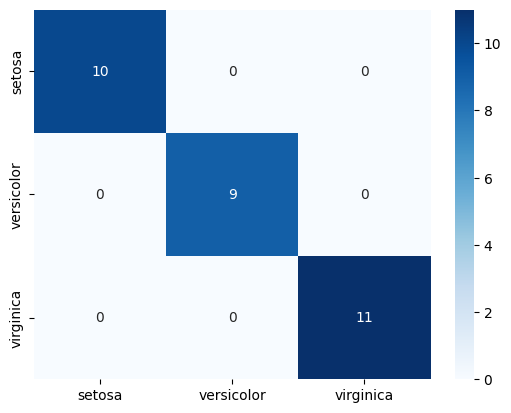

In [35]:
from sklearn.metrics import confusion_matrix

# 혼동 행렬 => confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

# 히트맵으로 시각화
sns.heatmap(cm, annot=True, cmap='Blues'
            , xticklabels=iris.target_names     # target 컬럼의 라벨 정보
            , yticklabels=iris.target_names)